In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DATA_DIRECTORY = "../data"
DATA_FILE = "stencil_starpu.csv"

In [4]:
df = pd.read_csv(DATA_DIRECTORY + '/' + DATA_FILE, sep=',').drop(columns=['nb_iterations', 'nb_repeat', 'rep', 'check_status', 'mesh_height'])
df = df.rename(columns={"mesh_width": "mesh_size"});df

,kernel,nb_partitions,mesh_size,timing
0,stencil,1,512,0.461492
1,stencil,1,512,0.324834
2,stencil,1,512,0.325116
3,stencil,1,512,0.324663
4,stencil,1,512,0.325713
...,...,...,...,...
655,stencil_starpu,2046,4096,7.865707
656,stencil_starpu,2046,4096,7.987665
657,stencil_starpu,2046,4096,7.792693
658,stencil_starpu,2046,4096,8.863301


In [5]:
df_ref = df[df['kernel'] == 'stencil'].drop(columns=['nb_partitions'])
df_ref = df_ref.groupby(['kernel','mesh_size'])['timing'].median().reset_index();df_ref

,kernel,mesh_size,timing
0,stencil,512,0.324748
1,stencil,1024,1.338901
2,stencil,2048,10.986165
3,stencil,4096,74.071335


In [6]:
df_test = df[df['kernel'] == 'stencil_starpu']
df_test = df_test.groupby(['kernel', 'mesh_size', 'nb_partitions'])['timing'].median().reset_index();df_test

,kernel,mesh_size,nb_partitions,timing
0,stencil_starpu,512,2,0.183254
1,stencil_starpu,512,4,0.150144
2,stencil_starpu,512,8,0.150486
3,stencil_starpu,512,16,0.176882
4,stencil_starpu,512,23,0.209892
5,stencil_starpu,512,24,0.218550
6,stencil_starpu,512,25,0.216443
7,stencil_starpu,512,32,0.278037
8,stencil_starpu,512,64,0.445985
9,stencil_starpu,512,128,0.732304


In [7]:
df_merged = pd.merge(df_test, df_ref[['mesh_size', 'timing']], on=['mesh_size'], how='left', suffixes=('', '_ref'));df_merged

,kernel,mesh_size,nb_partitions,timing,timing_ref
0,stencil_starpu,512,2,0.183254,0.324748
1,stencil_starpu,512,4,0.150144,0.324748
2,stencil_starpu,512,8,0.150486,0.324748
3,stencil_starpu,512,16,0.176882,0.324748
4,stencil_starpu,512,23,0.209892,0.324748
5,stencil_starpu,512,24,0.218550,0.324748
6,stencil_starpu,512,25,0.216443,0.324748
7,stencil_starpu,512,32,0.278037,0.324748
8,stencil_starpu,512,64,0.445985,0.324748
9,stencil_starpu,512,128,0.732304,0.324748


In [8]:
df_merged['speedup'] = df_merged['timing_ref'] / df_merged['timing'];df_merged

,kernel,mesh_size,nb_partitions,timing,timing_ref,speedup
0,stencil_starpu,512,2,0.183254,0.324748,1.772120
1,stencil_starpu,512,4,0.150144,0.324748,2.162906
2,stencil_starpu,512,8,0.150486,0.324748,2.157994
3,stencil_starpu,512,16,0.176882,0.324748,1.835959
4,stencil_starpu,512,23,0.209892,0.324748,1.547217
5,stencil_starpu,512,24,0.218550,0.324748,1.485922
6,stencil_starpu,512,25,0.216443,0.324748,1.500385
7,stencil_starpu,512,32,0.278037,0.324748,1.168004
8,stencil_starpu,512,64,0.445985,0.324748,0.728160
9,stencil_starpu,512,128,0.732304,0.324748,0.443461


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


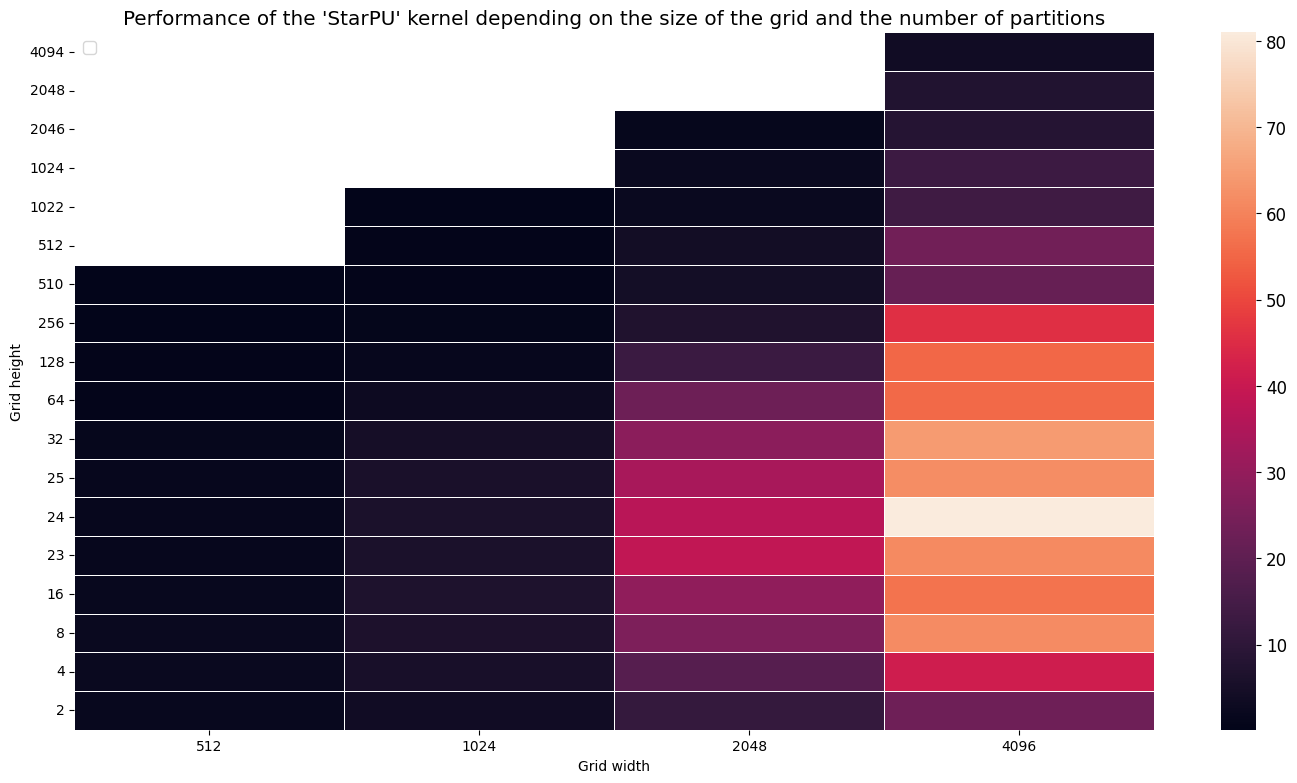

In [9]:
heatmap = pd.pivot_table(df_merged, values='speedup', index='nb_partitions', columns=['mesh_size'])
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(heatmap, annot=False, linewidths=.5, ax=ax)
ax.invert_yaxis()
plt.legend(loc='upper left')
plt.title("Performance of the 'StarPU' kernel depending on the size of the grid and the number of partitions")
plt.tight_layout()
plt.xlabel('Grid width')
plt.ylabel('Grid height')
plt.savefig("../plots/stencil_starpu/starpu_partitions.png", format='png')
plt.show()